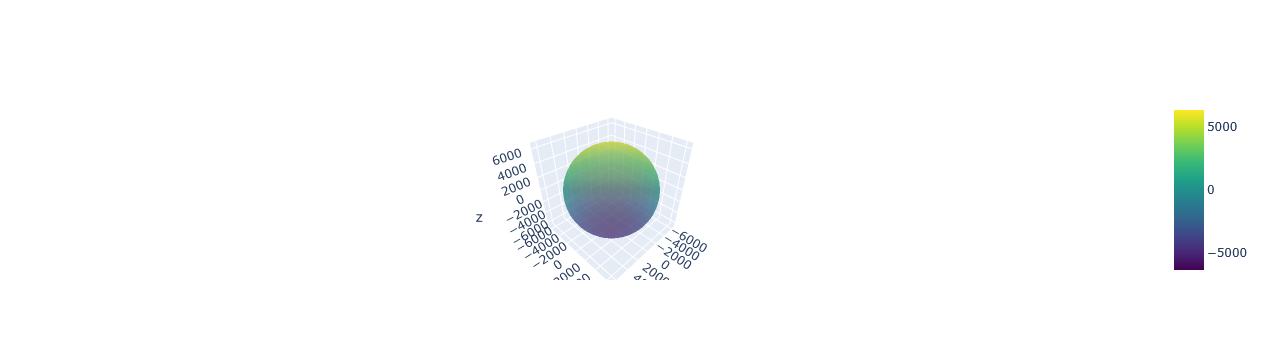

In [1]:
import plotly.graph_objects as go
import numpy as np

# Create a 3D figure
fig = go.Figure()

# Define Earth's radius
earth_radius = 6371

# Generate Earth's surface
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = earth_radius * np.outer(np.cos(u), np.sin(v))
y = earth_radius * np.outer(np.sin(u), np.sin(v))
z = earth_radius * np.outer(np.ones(np.size(u)), np.cos(v))

# Add Earth surface to the figure
fig.add_surface(x=x, y=y, z=z, colorscale='Viridis', opacity=0.5)

# Show the plot
fig.show()

Files in the zip archive: ['ne_110m_admin_0_countries.README.html', 'ne_110m_admin_0_countries.VERSION.txt', 'ne_110m_admin_0_countries.cpg', 'ne_110m_admin_0_countries.dbf', 'ne_110m_admin_0_countries.prj', 'ne_110m_admin_0_countries.shp', 'ne_110m_admin_0_countries.shx']
Shapefile loaded successfully.


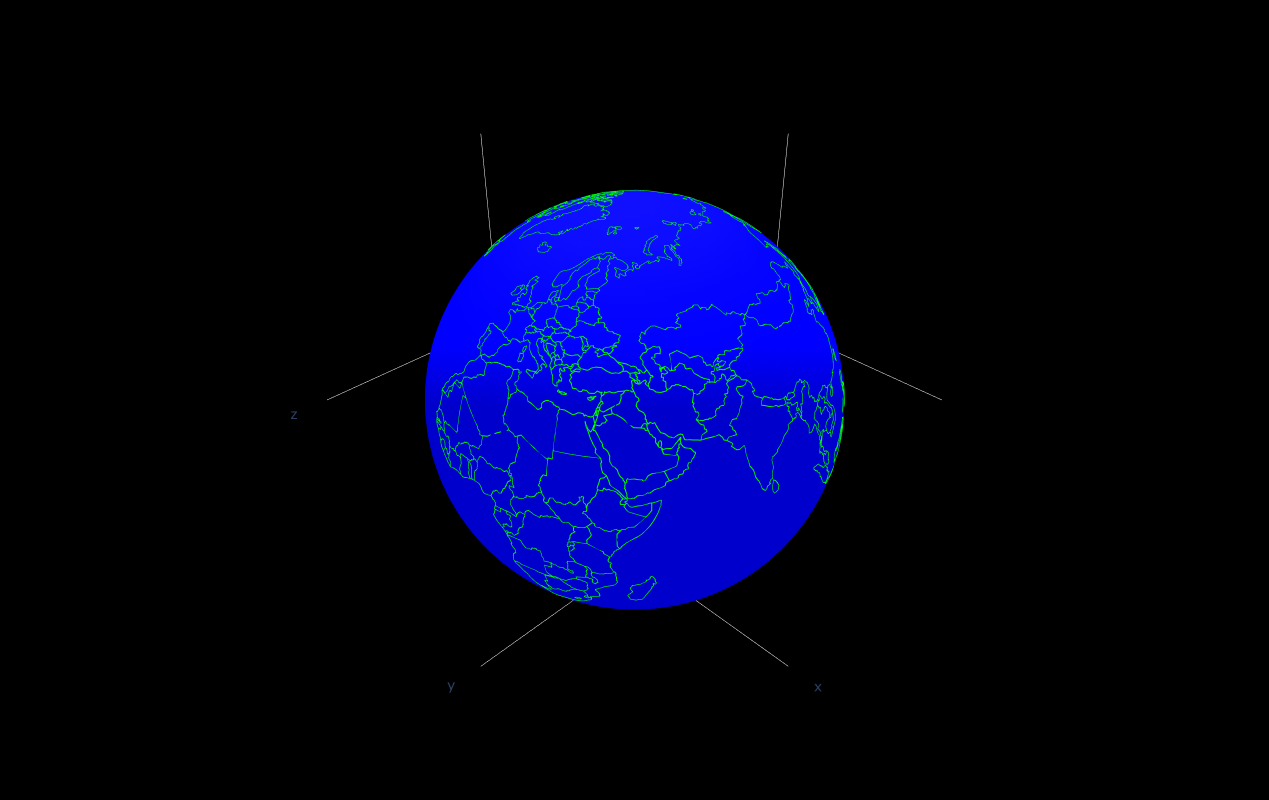

In [11]:
import numpy as np
import plotly.graph_objects as go
import geopandas as gpd
import requests
from io import BytesIO
import zipfile

def plot_earth_sphere(fig):
    R = 6371  # Earth's radius in km
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = R * np.outer(np.cos(u), np.sin(v))
    y = R * np.outer(np.sin(u), np.sin(v))
    z = R * np.outer(np.ones(np.size(u)), np.cos(v))

    fig.add_surface(x=x, y=y, z=z,
                    colorscale=[[0, 'rgb(0, 0, 255)'], [1, 'rgb(0, 0, 255)']],  # Deep blue for oceans
                    opacity=1, showscale=False)  # Set opacity to 1 for opaque Earth

def plot_country(poly):
    lon, lat = poly.exterior.coords.xy
    lon = np.array(lon)
    lat = np.array(lat)
    R = 6371  # Earth's radius in km
    x = R * np.cos(np.radians(lat)) * np.cos(np.radians(lon))
    y = R * np.cos(np.radians(lat)) * np.sin(np.radians(lon))
    z = R * np.sin(np.radians(lat))
    return x, y, z

# URL of the shapefile
url = 'https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip'

# Download and extract the shapefile
try:
    response = requests.get(url)
    with zipfile.ZipFile(BytesIO(response.content)) as z:
        print("Files in the zip archive:", z.namelist())
        # Find the .shp file
        shp_file = next(name for name in z.namelist() if name.endswith('.shp'))
        # Extract the .shp file and related files
        z.extractall()
    
    # Now read the extracted shapefile
    gdf = gpd.read_file(shp_file)
    print("Shapefile loaded successfully.")
except Exception as e:
    print(f"Error processing shapefile: {e}")
    gdf = None

if gdf is not None:
    fig = go.Figure()
    plot_earth_sphere(fig)

    for i in gdf.index:
        polys = gdf.loc[i].geometry
        if polys.geom_type == 'Polygon':
            x, y, z = plot_country(polys)
            fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='lines', 
                                       line=dict(color='rgb(0, 255, 0)', width=2),  # Green color for landmasses
                                       showlegend=False))
        elif polys.geom_type == 'MultiPolygon':
            for poly in polys.geoms:
                x, y, z = plot_country(poly)
                fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='lines', 
                                           line=dict(color='rgb(0, 255, 0)', width=2),  # Green color for landmasses
                                           showlegend=False))

    fig.update_layout(
        scene = dict(
            xaxis = dict(
                showbackground=False,
                showline=False,  # Use showline instead of showaxis
                showgrid=False,
                showticklabels=False,
            ),
            yaxis = dict(
                showbackground=False,
                showline=False,  # Use showline instead of showaxis
                showgrid=False,
                showticklabels=False,
            ),
            zaxis = dict(
                showbackground=False,
                showline=False,  # Use showline instead of showaxis
                showgrid=False,
                showticklabels=False,
            ),
            bgcolor='rgb(0, 0, 0)'
        ),
        height=800,
        margin=dict(r=10, l=10, b=10, t=10),
        paper_bgcolor='rgb(0, 0, 0)',
    )
else:
    print("Failed to load the shapefile data. Cannot create the plot.")
fig.show()